In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns 
df = pd.read_excel(open('/Users/ymzhang/Desktop/data.xlsx','rb'), sheetname='Sheet0')

#### 检察NULL值

发现没有任何空值

In [3]:
df.isnull().describe()

,order_date,restaurant_id,retailer_id,push,yichang,min60,judan,chaping,customer_tousu,shoppers_tousu,...,liezhi,deliver_time,yichang_rate,min60_rate,judan_rate,chaping_rate,tousu_rate,liezhi_rate,youzhi_rate,push_num_bad_rate
count,24712,24712,24712,24712,24712,24712,24712,24712,24712,24712,...,24712,24712,24712,24712,24712,24712,24712,24712,24712,24712
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,24712,24712,24712,24712,24712,24712,24712,24712,24712,24712,...,24712,24712,24712,24712,24712,24712,24712,24712,24712,24712


#### 运单量的分布图

/Users/ymzhang/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


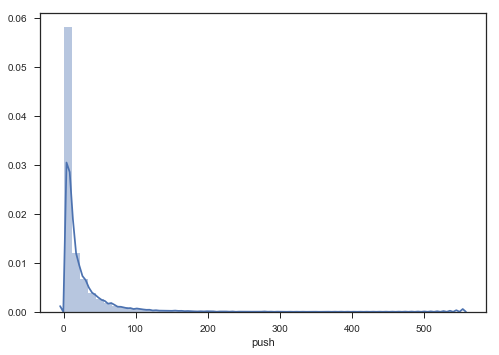

In [4]:
sns.set_style("ticks")
sns.distplot(df["push"]) 

#### 优质单率的分布


/Users/ymzhang/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


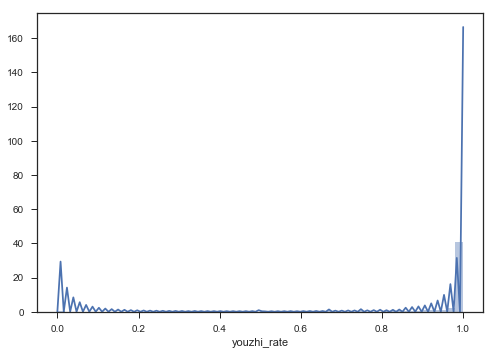

In [5]:
sns.set_style("ticks")
sns.distplot(df["youzhi_rate"]) 

#### 优质单率的直方图

(array([  3.15000000e+02,   1.20000000e+01,   1.10000000e+01,
          4.40000000e+01,   1.60000000e+01,   2.55000000e+02,
          2.45000000e+02,   2.88000000e+02,   9.48000000e+02,
          2.25780000e+04]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

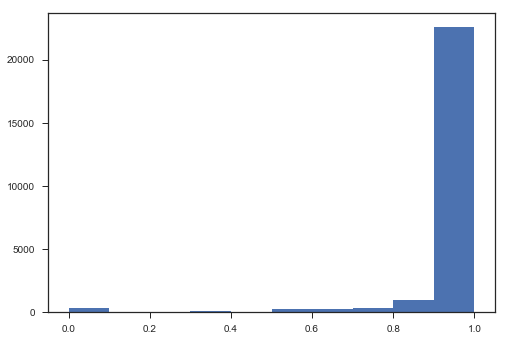

In [6]:
plt.hist(df["youzhi_rate"])

#### 推单数的直方图

(array([    0.,  3763.,  2625.,  1970.,  1444.,  1241.,  1020.,   844.,
          713.,   654.,   577.,   507.,   480.,   464.,   390.,   337.,
          344.,   294.,   271.,   283.,   256.,   230.,   228.,   180.,
          208.,   196.,   189.,   178.,   159.,   167.,   168.,   163.,
          134.,   147.,   127.,   124.,   125.,   108.,    85.,    97.,
           95.,    88.,    82.,    99.,    93.,    75.,    87.,    75.,
           65.,    58.,    77.,    68.,    47.,    73.,    59.,    59.,
           52.,    56.,    49.,    44.,    52.,    41.,    38.,    44.,
           40.,    38.,    41.,    51.,    43.,    43.,    32.,    38.,
           38.,    21.,    30.,    16.,    26.,    23.,    22.,    35.,
           28.,    26.,    15.,    20.,    25.,    22.,    19.,    14.,
           20.,    20.,    19.,    17.,    19.,    19.,    21.,    15.,
            9.,    15.,    28.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21

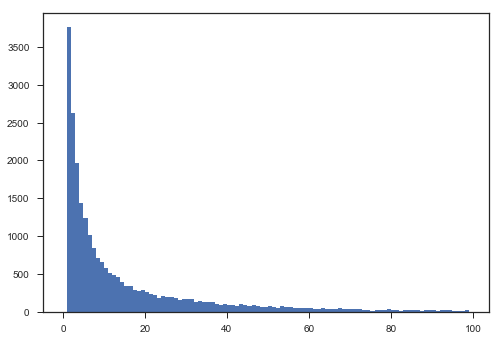

In [7]:
plt.hist(df["push"],bins=np.arange(100))

#### 配送时长的直方图

(array([  6.43000000e+02,   1.02560000e+04,   1.26130000e+04,
          1.08400000e+03,   1.02000000e+02,   9.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   0.        ,   13.43166667,   26.86333333,   40.295     ,
          53.72666667,   67.15833333,   80.59      ,   94.02166667,
         107.45333333,  120.885     ,  134.31666667]),
 <a list of 10 Patch objects>)

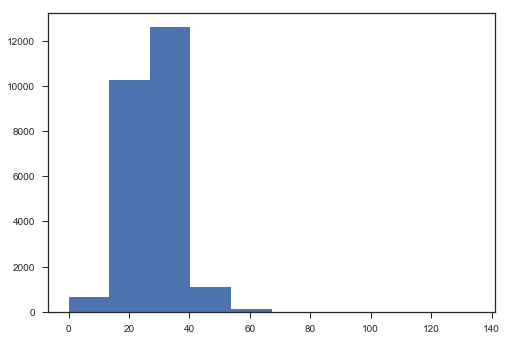

In [8]:
plt.hist(df["deliver_time"])

In [9]:
df.columns

Index(['order_date', 'restaurant_id', 'retailer_id', 'push', 'yichang',
       'min60', 'judan', 'chaping', 'customer_tousu', 'shoppers_tousu',
       'tousu', 'liezhi', 'deliver_time', 'yichang_rate', 'min60_rate',
       'judan_rate', 'chaping_rate', 'tousu_rate', 'liezhi_rate',
       'youzhi_rate', 'push_num_bad_rate'],
      dtype='object')

In [10]:
name=['restaurant_id','retailer_id','push','youzhi_rate','deliver_time']
names=(['push','youzhi_rate','deliver_time'])

#### 对数据做标准化变换

In [11]:
df1=df[names]
scaler=StandardScaler()
df1_scaled=scaler.fit_transform(df1)

#### 用Isolation Forest 来检测异常值

In [12]:
rng = np.random.RandomState(42)
clf=IsolationForest(max_samples=500,random_state=rng)

In [13]:
clf.fit(df1_scaled)
df1_pred=clf.predict(df1_scaled)

In [14]:
df1_pred

array([-1, -1,  1, ...,  1,  1,  1])

In [15]:
df['cluster']=df1_pred

In [16]:
import pandas as pd
pred=pd.Series(df1_pred)

#### 异常组和正常组统计描述对比
* -1:异常组 

* 1:正常组 

In [17]:
df[['push','yichang_rate','min60_rate','judan_rate','chaping_rate','tousu_rate','deliver_time','youzhi_rate','cluster']].groupby('cluster').describe()


chaping_rate  deliver_time    judan_rate    min60_rate  \
cluster                                                                 
-1      count   2472.000000   2472.000000   2472.000000   2472.000000   
        mean       0.008555     29.320380      0.082686      0.057923   
        std        0.070976     16.911884      0.208933      0.145500   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        0.000000     22.255473      0.000000      0.000000   
        50%        0.000000     31.512913      0.000000      0.000000   
        75%        0.000000     39.964596      0.000000      0.043478   
        max        1.000000    134.316667      1.000000      1.000000   
 1      count  22240.000000  22240.000000  22240.000000  22240.000000   
        mean       0.000807     27.746394      0.002627      0.002841   
        std        0.008278      6.087109      0.018222      0.015303   
        min        0.000000      9.333333      0.000000      0.000000   
        25%        0.000000     23.683831      0.000000      0.000000   
        50%        0.000000     27.589444      0.000000      0.000000   
        75%        0.000000     31.566667      0.000000      0.000000   
        max        0.250000     48.416667      0.250000      0.250000   

                       push    tousu_rate  yichang_rate   youzhi_rate  
cluster                                                                
-1      count   2472.000000   2472.000000   2472.000000   2472.000000  
        mean      54.408981      0.001516      0.135027      0.717955  
        std       72.523200      0.019496      0.285577      0.328431  
        min        1.000000      0.000000      0.000000      0.000000  
        25%        2.000000      0.000000      0.000000      0.571429  
        50%        8.000000      0.000000      0.000000      0.846688  
        75%      105.000000      0.000000      0.052632      0.984283  
        max      552.000000      0.500000      1.000000      1.000000  
 1      count  22240.000000  22240.000000  22240.000000  22240.000000  
        mean      14.529631      0.000132      0.004193      0.989509  
        std       18.446540      0.003214      0.021133      0.032976  
        min        1.000000      0.000000      0.000000      0.750000  
        25%        2.000000      0.000000      0.000000      1.000000  
        50%        7.000000      0.000000      0.000000      1.000000  
        75%       19.000000      0.000000      0.000000      1.000000  
        max      117.000000      0.166667      0.250000      1.000000

In [18]:
center=df[['push','yichang_rate','min60_rate','judan_rate','chaping_rate','tousu_rate','deliver_time','youzhi_rate','cluster']].groupby('cluster').mean()


#### 展示异常组和正常组的差别
* X轴：推单量 
* Y轴：优质完成率 
* '+' 号标记这组均质

* 紫色：异常值
* 绿色：正常值

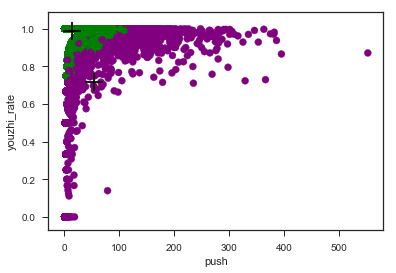

In [19]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow','purple'])
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df.push, df.youzhi_rate, c=colors[df.cluster])

# cluster centers, marked by "+"
plt.scatter(center.push, center.youzhi_rate, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('push')
plt.ylabel('youzhi_rate')

In [20]:
pred.value_counts()

 1    22240
-1     2472
dtype: int64

In [21]:
indexes = [i for i,x in enumerate(df1_pred) if x == -1]

In [22]:
iforest=df.ix[indexes]

#### Iforest tree 去除异常值后数据统计描述

In [23]:
iforest[names].describe()

,push,youzhi_rate,deliver_time
count,2472.000000,2472.000000,2472.000000
mean,54.408981,0.717955,29.320380
std,72.523200,0.328431,16.911884
min,1.000000,0.000000,0.000000
25%,2.000000,0.571429,22.255473
50%,8.000000,0.846688,31.512913
75%,105.000000,0.984283,39.964596
max,552.000000,1.000000,134.316667


** 去除异常值中优质配送率小于0.9的，只选取推单数大于7的餐厅 ** 

In [24]:
scaler=StandardScaler()
names1=['push','yichang_rate','min60_rate','judan_rate','chaping_rate','tousu_rate','deliver_time']
iforest_new=iforest.ix[((iforest.youzhi_rate<0.9)&(iforest.push>7)),]
iforest1=iforest_new[name]

In [25]:
iforest_new.shape

(490, 22)

In [26]:
iforest1[names].describe()

,push,youzhi_rate,deliver_time
count,490.000000,490.000000,490.000000
mean,54.008163,0.754426,36.943728
std,64.026962,0.153231,9.365147
min,8.000000,0.000000,0.000000
25%,14.000000,0.700000,30.758333
50%,28.500000,0.797532,38.539167
75%,69.750000,0.861023,43.060573
max,552.000000,0.899083,62.296970


#### 用K-means找异常值 

In [27]:
df1_scaled=pd.DataFrame(df1_scaled)
df1_scaled.columns=['push','youzhi_rate','deliver_time']

In [28]:
km=KMeans(n_clusters=4,random_state=1)
km.fit(df1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [29]:
df1['cluster']=km.labels_

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
df1.sort('cluster').head()

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,push,youzhi_rate,deliver_time,cluster
0,146,0.883562,0.000000,0
2395,118,0.957627,38.315152,0
11327,98,0.989796,24.006293,0
6721,124,0.991935,31.866116,0
6719,70,1.000000,25.855238,0


In [31]:
centers2=df1.groupby('cluster').mean()
centers2

,push,youzhi_rate,deliver_time
cluster,,,
0,109.008736,0.969651,30.786961
1,2.804511,0.178114,17.084891
2,13.394128,0.966905,34.262984
3,10.939588,0.990163,23.331784


#### 用silhouette_score确定选择几个组

In [33]:
# calculate SC for K=2 through K=6
from sklearn import metrics
k_range = range(2, 6)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df1[['push','youzhi_rate','deliver_time']])
    scores.append(metrics.silhouette_score(df1_scaled, km.labels_))

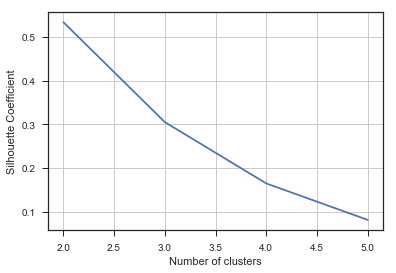

In [34]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

根据上面的结果显示分4组做K-means分析最好

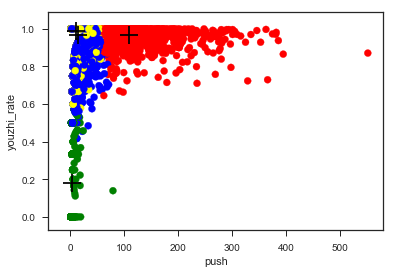

In [35]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow','purple','orange'])
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df1.push, df1.youzhi_rate, c=colors[df1.cluster])

# cluster centers, marked by "+"
plt.scatter(centers2.push, centers2.youzhi_rate, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.ylabel('youzhi_rate')
plt.xlabel('push')

从上面图来说，觉得kmeans 这个方法不太适用于异常商家的识别问题。感觉到第三组和第四组太混乱，没有明显的界限。此处选择k=4。

#### Hierarchy cluster

In [36]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np 
%matplotlib inline 


In [37]:
Z=linkage(df1_scaled,'ward')

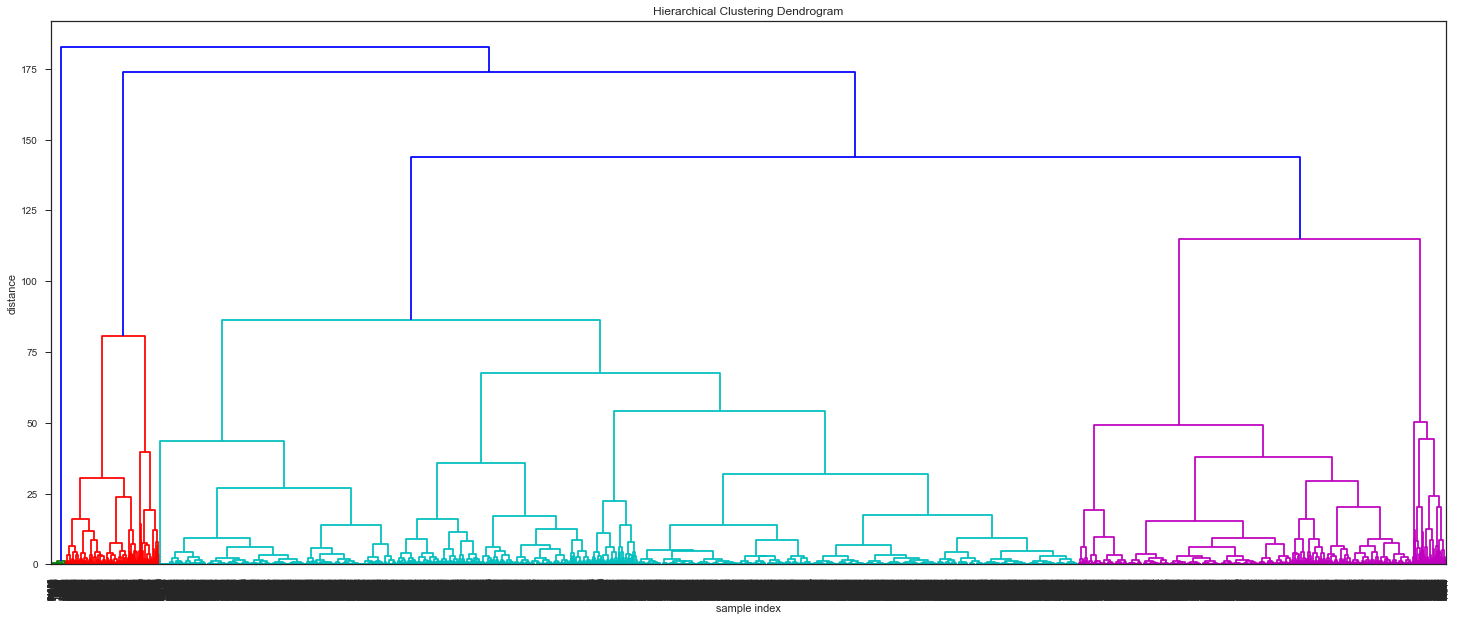

In [38]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [39]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters
k=4
df1['Hcluster']=fcluster(Z, k, criterion='maxclust')-1

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


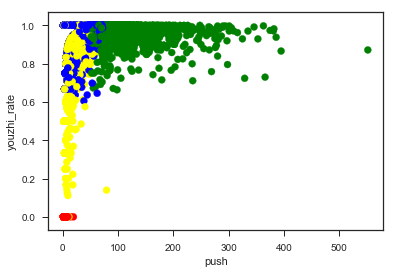

In [40]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow','purple','orange','pink'])
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df1.push, df1.youzhi_rate, c=colors[df1.Hcluster])

# cluster centers, marked by "+"
#plt.scatter(centers2.push, centers2.youzhi_rate, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('push')
plt.ylabel('youzhi_rate')

In [41]:
writer = pd.ExcelWriter('iforest_new.xlsx', engine='xlsxwriter')
iforest.to_excel(writer, sheet_name='Sheet1')

In [42]:
writer = pd.ExcelWriter('iforest_new.xlsx', engine='xlsxwriter')
iforest_new.to_excel(writer, sheet_name='Sheet1')